In [1]:
import numpy as np
import re ##Regular Expression##Pattern matching functions
from scipy.stats import binom
import math
import multiprocessing as mp
from qutip import *
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from qutip.qip.operations import *
from qutip.qip.circuit import *
from collections import Counter
import random
from QuantumDots import system
from QuantumDots import PlottingTools
from QuantumDots import EntanglementIndicators
from QuantumDots import ExperimentSimulation
basis_list = []
for i in range(2):
    for j in range(2):
        for l in range(2):
            for m in range(2):
                basis_list.append(tensor(basis(2,i), basis(2,j), basis(2,l), basis(2,m)))
Operators=system.QDoperators();
OpsList=Operators.CompleteOperatorList();
#####
AnnOps=Operators.AnnihilationOps();
DecohGamma=1E-4;
DecohOps=[]
for i in range(len(AnnOps)):
    DecohOps.append(np.sqrt(DecohGamma)*AnnOps[i])

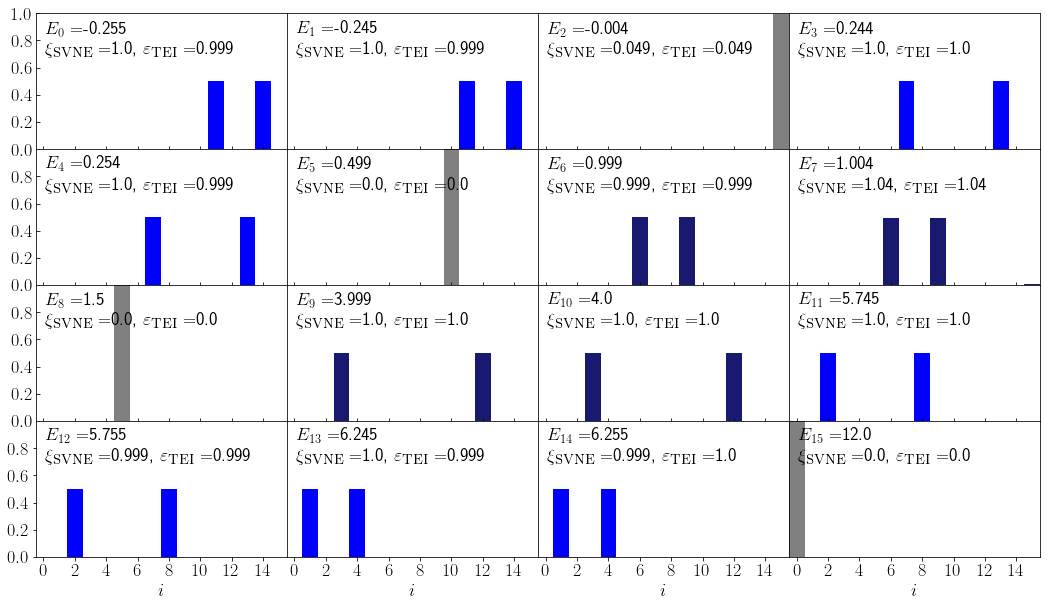

In [2]:
Operators=system.QDoperators();
OpsList=Operators.CompleteOperatorList();
###EigenStates##
QDEigens=system.QDEigenstates([[0.05, 0.005, 4, 1, 0.5, 0.5]],OpsList,1E-10);
EigenStateList=QDEigens.generate_Eigenstates(0);
EigenValueList=QDEigens.generate_Eigenvalues(0);
ProjectionList=QDEigens.generate_Projections(0);
##NumberOps###
NOps=Operators.OccNumberOps();
##Variance##
NExpectVals=QDEigens.expectation_values(0,[NOps[0]*NOps[3],NOps[0],NOps[3]],[1,1,1]);
VarianceList=abs(NExpectVals[0]-np.multiply(NExpectVals[1],NExpectVals[2]));
##Entanglement##
ComputeEntanglement=EntanglementIndicators.Entanglement(EigenStateList,16,2,1E-7);
SVNEs=ComputeEntanglement.SVNE_compute();
SingleProjTEIs=ComputeEntanglement.SingleProj_TEI_compute('zzzz');
##Plotting Projections##
LabelList=[];
for i in range(16):
    PlotLabels=[];
    PlotLabels.append(r'$E_{'+str(i)+'}=$'+str(int(1000*EigenValueList[i])/1000.));
    PlotLabels.append(r'$\xi_{\textsc{svne}}=$'+str(int(1000*SVNEs[i])/1000.)+r', $\varepsilon_{\textsc{tei}}=$'+str(int(1000*SingleProjTEIs[i])/1000.));
    LabelList.append(PlotLabels);
xax=range(16);
from QuantumDots import PlottingTools;
GeneratePlots=PlottingTools.PlotTools();
fig1=GeneratePlots.plotBarGraphs(4,4,xax,ProjectionList,ylim=[0,1],xlim=[-0.5,15.5],textLabels=LabelList)

In [3]:
fig1.savefig('fig_eigenvec_projections.pdf')

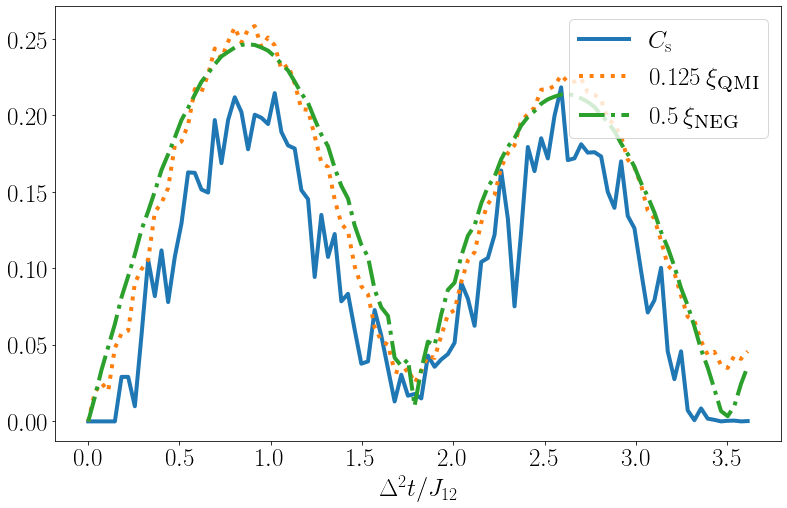

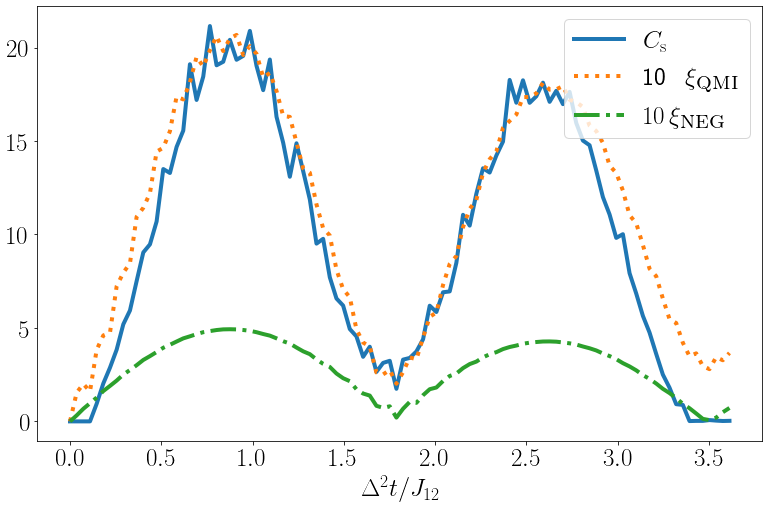

In [4]:
Operators=system.QDoperators();
OpsList=Operators.CompleteOperatorList();
#####
QuantDots=system.QDsystem([0.05, 0.005, 4, 1, 0.5, 0.5],OpsList);
Ham=QuantDots.Hamiltonian();
####Initialisations######
initRho=ket2dm(basis_list[9]);
tsteps=100;
tmin=0.;
tmax=460.*np.pi;
precision=1E-10;
time_insts=np.linspace(tmin,tmax,tsteps);
###DecohOps###
AnnOps=Operators.AnnihilationOps();
DecohGamma=1E-4;
DecohOps=[]
for i in range(len(AnnOps)):
    DecohOps.append(np.sqrt(DecohGamma)*AnnOps[i])
####Dynamics####
GenerateQDdynamics=system.QDDynamics(initRho,Ham,[DecohOps[0],DecohOps[3]],tmin,tmax,tsteps,precision);
RhoTList=GenerateQDdynamics.state_dynamics();
####Entanglement####
ComputeEntanglement=EntanglementIndicators.Entanglement(RhoTList,16,2,1E-7);
QMIs=ComputeEntanglement.QMI_compute();
Negs=ComputeEntanglement.negativity_compute();
ScaledQMIs=[QMIs[i]/8. for i in range(len(QMIs))]
ScaledNegA=[Negs[2*i]/2. for i in range(tsteps)]
LargeScaledQMIs=[QMIs[i]*10. for i in range(len(QMIs))]
LargeScaledNegA=[Negs[2*i]*10 for i in range(tsteps)]
####Experiment Simulation####
TotalEnsembleSize=100;
MeasureSubSysIndex=[0,3];
ProbTunnel=0.9; ##Probability of tunnelling out
Experiment=ExperimentSimulation.ExpSimulation(RhoTList,TotalEnsembleSize,MeasureSubSysIndex,ProbTunnel);
###One Ensemble###
Covariance=Experiment.experiment_simulator_OneEnsemblePerInstant();
###Many Ensembles###
NumOfEnsembles=1000;
EnsembleCorrelation=Experiment.experiment_simulator_ManyEnsemblesPerInstant(NumOfEnsembles);
###Plotting Experiment results in comparison with QMI###
ScaledTime=[time_insts[i]*(0.05*0.05) for i in range(len(time_insts))]
GeneratePlots=PlottingTools.PlotTools();
fig1=GeneratePlots.plotLineGraph(3,ScaledTime,[Covariance,ScaledQMIs,ScaledNegA],xlabel=r'$\Delta^{2}t/J_{12}$',legends=[r'$C_{\mathrm{s}}$',r'$0.125 \, \xi_{\textsc{qmi}}$',r'$0.5 \, \xi_{\textsc{neg}}$'])
fig2=GeneratePlots.plotLineGraph(3,ScaledTime,[EnsembleCorrelation,LargeScaledQMIs,LargeScaledNegA],xlabel=r'$\Delta^{2}t/J_{12}$',legends=[r'$C_{\mathrm{s}}$',r'10 \, $\xi_{\textsc{qmi}}$',r'$10 \, \xi_{\textsc{neg}}$'])

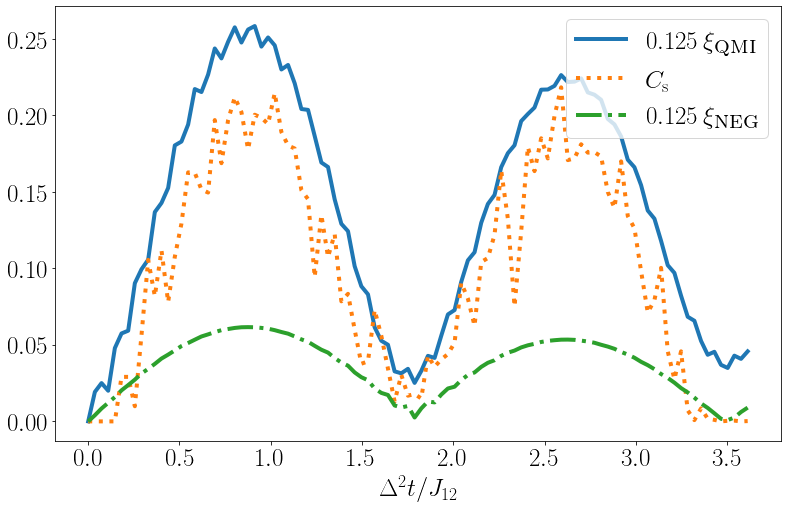

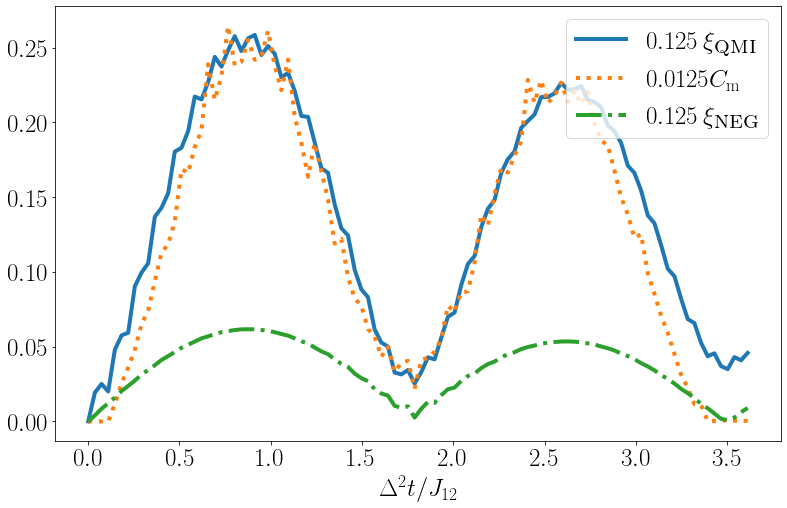

In [5]:
ScaledNegA=[Negs[2*i]/8. for i in range(tsteps)]
ScaledEnsembleCorrelation=[EnsembleCorrelation[i]/80. for i in range(tsteps)]
fig1=GeneratePlots.plotLineGraph(3,ScaledTime,[ScaledQMIs,Covariance,ScaledNegA],xlabel=r'$\Delta^{2}t/J_{12}$',legends=[r'$0.125 \, \xi_{\textsc{qmi}}$',r'$C_{\mathrm{s}}$',r'$0.125 \, \xi_{\textsc{neg}}$'])
fig2=GeneratePlots.plotLineGraph(3,ScaledTime,[ScaledQMIs,ScaledEnsembleCorrelation,ScaledNegA],xlabel=r'$\Delta^{2}t/J_{12}$',legends=[r'$0.125 \, \xi_{\textsc{qmi}}$',r'$0.0125 C_{\mathrm{m}}$',r'$0.125 \, \xi_{\textsc{neg}}$'])

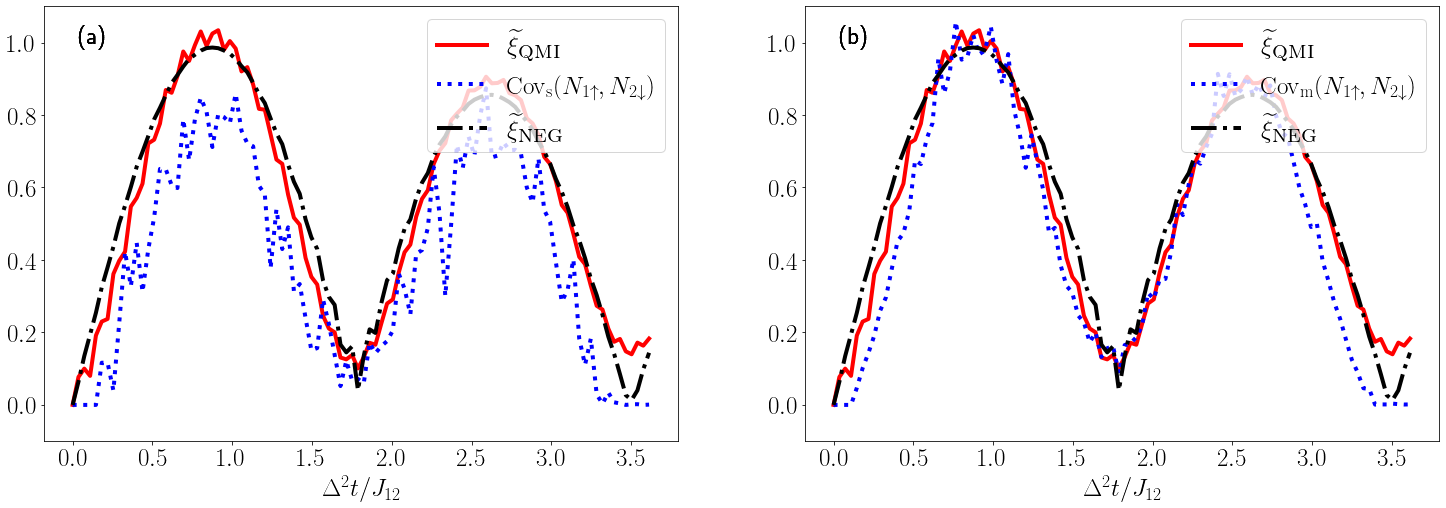

In [6]:
ScaledQMIs=[QMIs[i]/2. for i in range(len(QMIs))]
ScaledNegA=[Negs[2*i]*2 for i in range(tsteps)]
ScaledEnsembleCorrelation=[EnsembleCorrelation[i]/20. for i in range(tsteps)]
ScaledCovariance=[Covariance[i]*4. for i in range(tsteps)]
fig1=GeneratePlots.plotTwoLineGraph(3,ScaledTime,[[ScaledQMIs,ScaledCovariance,ScaledNegA],[ScaledQMIs,ScaledEnsembleCorrelation,ScaledNegA]],xlabel=r'$\Delta^{2}t/J_{12}$', legends=[[r'$\widetilde{\xi}_{\textsc{qmi}}$',r'$\mathrm{Cov}_{\mathrm{s}}(N_{1\uparrow},N_{2\downarrow})$',r'$\widetilde{\xi}_{\textsc{neg}}$'],[r'$\widetilde{\xi}_{\textsc{qmi}}$',r'$\mathrm{Cov}_{\mathrm{m}}(N_{1\uparrow},N_{2\downarrow})$',r'$\widetilde{\xi}_{\textsc{neg}}$']])

In [7]:
fig1.savefig('fig_covariance_single_vs_multiple_ensemble.pdf')

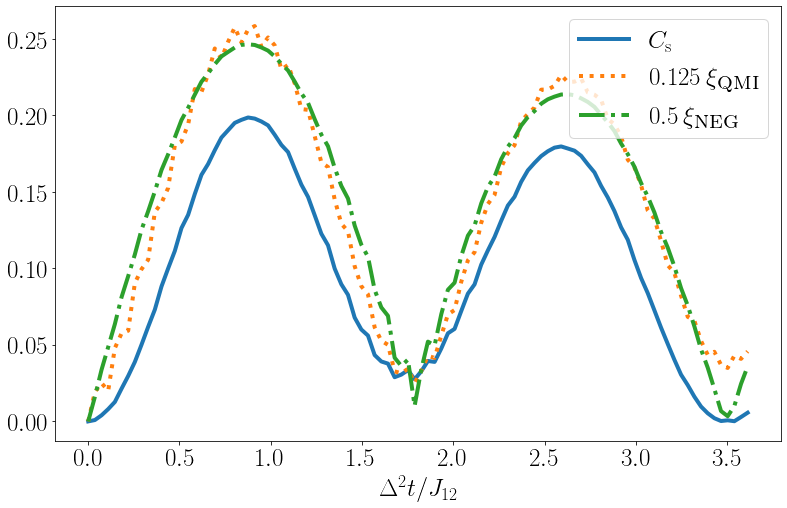

In [8]:
Operators=system.QDoperators();
OpsList=Operators.CompleteOperatorList();
#####
QuantDots=system.QDsystem([0.05, 0.005, 4, 1, 0.5, 0.5],OpsList);
Ham=QuantDots.Hamiltonian();
####Initialisations######
initRho=ket2dm(basis_list[9]);
tsteps=100;
tmin=0.;
tmax=460.*np.pi;
precision=1E-10;
time_insts=np.linspace(tmin,tmax,tsteps);
###DecohOps###
AnnOps=Operators.AnnihilationOps();
DecohGamma=1E-4;
DecohOps=[]
for i in range(len(AnnOps)):
    DecohOps.append(np.sqrt(DecohGamma)*AnnOps[i])
####Dynamics####
GenerateQDdynamics=system.QDDynamics(initRho,Ham,[DecohOps[0],DecohOps[3]],tmin,tmax,tsteps,precision);
RhoTList=GenerateQDdynamics.state_dynamics();
####Entanglement####
ComputeEntanglement=EntanglementIndicators.Entanglement(RhoTList,16,2,1E-7);
QMIs=ComputeEntanglement.QMI_compute();
Negs=ComputeEntanglement.negativity_compute();
ScaledQMIs=[QMIs[i]/8. for i in range(len(QMIs))]
ScaledNegA=[Negs[2*i]/2. for i in range(tsteps)]
LargeScaledQMIs=[QMIs[i]*10. for i in range(len(QMIs))]
LargeScaledNegA=[Negs[2*i]*10 for i in range(tsteps)]
####Experiment Simulation####
TotalEnsembleSize=100000;
MeasureSubSysIndex=[0,3];
ProbTunnel=0.9; ##Probability of tunnelling out
Experiment=ExperimentSimulation.ExpSimulation(RhoTList,TotalEnsembleSize,MeasureSubSysIndex,ProbTunnel);
###One Ensemble###
Covariance=Experiment.experiment_simulator_OneEnsemblePerInstant();
###Plotting Experiment results in comparison with QMI###
ScaledTime=[time_insts[i]*(0.05*0.05) for i in range(len(time_insts))]
GeneratePlots=PlottingTools.PlotTools();
fig1=GeneratePlots.plotLineGraph(3,ScaledTime,[Covariance,ScaledQMIs,ScaledNegA],xlabel=r'$\Delta^{2}t/J_{12}$',legends=[r'$C_{\mathrm{s}}$',r'$0.125 \, \xi_{\textsc{qmi}}$',r'$0.5 \, \xi_{\textsc{neg}}$'])

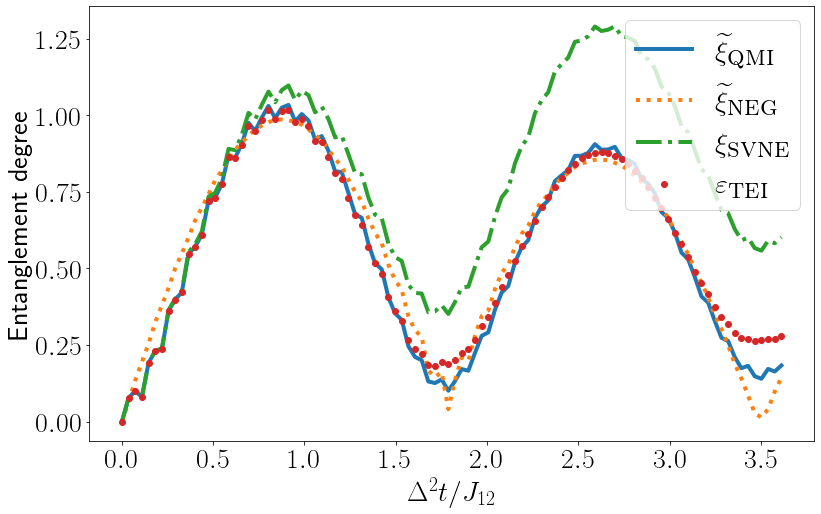

In [3]:
Operators=system.QDoperators();
OpsList=Operators.CompleteOperatorList();
#####
QuantDots=system.QDsystem([0.05, 0.005, 4, 1, 0.5, 0.5],OpsList);
Ham=QuantDots.Hamiltonian();
####Initialisations######
initRho=ket2dm(basis_list[9]);
tsteps=100;
tmin=0.;
tmax=460.*np.pi;
precision=1E-10;
###DecohOps###
AnnOps=Operators.AnnihilationOps();
DecohGamma=1E-4;
DecohOps=[]
for i in range(len(AnnOps)):
    DecohOps.append(np.sqrt(DecohGamma)*AnnOps[i])
##NumberOps###
NOps=Operators.OccNumberOps();
####Dynamics####
GenerateQDdynamics=system.QDDynamics(initRho,Ham,[DecohOps[0],DecohOps[3]],tmin,tmax,tsteps,precision);
RhoTList=GenerateQDdynamics.state_dynamics();
NExpectVals=GenerateQDdynamics.expectation_values([NOps[0]*NOps[3],NOps[0],NOps[3]],[1,1,1]);
##Entanglement##
ComputeEntanglement=EntanglementIndicators.Entanglement(RhoTList,16,2,1E-7);
QMIs=ComputeEntanglement.QMI_compute();
SVNEs=ComputeEntanglement.SVNE_compute();
Negs=ComputeEntanglement.negativity_compute();
NegA=[Negs[2*i] for i in range(tsteps)]
TEIs=ComputeEntanglement.TEI_compute();
SingleProjTEIs=ComputeEntanglement.SingleProj_TEI_compute('zzzz');
##Plotting Variance###
time_insts=np.linspace(tmin,tmax,tsteps);
VarianceList=[NExpectVals[0]-np.multiply(NExpectVals[1],NExpectVals[2])];
GeneratePlots=PlottingTools.PlotTools();
##Plotting Entanglement indicators##
ScaledTime=[time_insts[i]*(0.05*0.05) for i in range(int(len(time_insts)))]
RedQMIs=[QMIs[i]/2. for i in range(int(len(time_insts)))]
RedNegA=[NegA[i]*2. for i in range(int(len(time_insts)))]
RedSVNEs=[SVNEs[i] for i in range(int(len(time_insts)))]
RedTEIs=[SingleProjTEIs[i] for i in range(int(len(time_insts)))]
fig2=GeneratePlots.plotLineGraph(4,ScaledTime,[RedQMIs,RedNegA,RedSVNEs,RedTEIs],xlabel=r'$\Delta^{2} t/J_{12}$',ylabel='Entanglement degree',legends=[r'$\widetilde{\xi}_{\textsc{qmi}}$',r'$\widetilde{\xi}_{\textsc{neg}}$',r'$\xi_{\textsc{svne}}$',r'$\varepsilon_{\textsc{tei}}$']);

In [4]:
fig2.savefig('fig_entang.pdf')

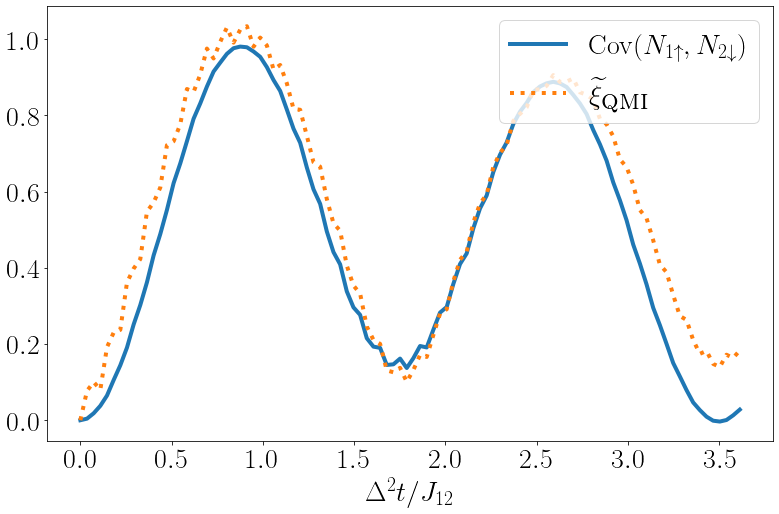

In [5]:
Operators=system.QDoperators();
OpsList=Operators.CompleteOperatorList();
#####
QuantDots=system.QDsystem([0.05, 0.005, 4, 1, 0.5, 0.5],OpsList);
Ham=QuantDots.Hamiltonian();
####Initialisations######
initRho=ket2dm(basis_list[9]);
tsteps=100;
tmin=0.;
tmax=460.*np.pi;
precision=1E-10;
###DecohOps###
AnnOps=Operators.AnnihilationOps();
DecohGamma=1E-4;
DecohOps=[]
for i in range(len(AnnOps)):
    DecohOps.append(np.sqrt(DecohGamma)*AnnOps[i])
##NumberOps###
NOps=Operators.OccNumberOps();
####Dynamics####
GenerateQDdynamics=system.QDDynamics(initRho,Ham,[DecohOps[0],DecohOps[3]],tmin,tmax,tsteps,precision);
RhoTList=GenerateQDdynamics.state_dynamics();
NExpectVals=GenerateQDdynamics.expectation_values([NOps[0]*NOps[3],NOps[0],NOps[3]],[1,1,1]);
##Entanglement##
ComputeEntanglement=EntanglementIndicators.Entanglement(RhoTList,16,2,1E-7);
QMIs=ComputeEntanglement.QMI_compute();
SVNEs=ComputeEntanglement.SVNE_compute();
TEIs=ComputeEntanglement.TEI_compute();
SingleProjTEIs=ComputeEntanglement.SingleProj_TEI_compute('zzzz');
##Plotting Variance###
time_insts=np.linspace(tmin,tmax,tsteps);
VarianceList=[NExpectVals[0]-np.multiply(NExpectVals[1],NExpectVals[2])];
GeneratePlots=PlottingTools.PlotTools();
##Plotting Entanglement indicators##
ScaledTime=[time_insts[i]*(0.05*0.05) for i in range(len(time_insts))]
ScaledQMIs=[QMIs[i]/2. for i in range(len(QMIs))]
ScaledVariance=[VarianceList[0][i]*4. for i in range(len(time_insts))]
fig5=GeneratePlots.plotLineGraph(2,ScaledTime,[ScaledVariance,ScaledQMIs],xlabel=r'$\Delta^{2} t/J_{12}$',legends=[r'$\mathrm{Cov}(N_{1\uparrow}, N_{2\downarrow})$',r'$\widetilde{\xi}_{\textsc{qmi}}$']);

In [6]:
fig5.savefig('Covariance_QMI_compare.pdf')